In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_churn = pd.read_csv("/content/telecom_customer_churn.csv")
data_dictionary = pd.read_csv("/content/telecom_data_dictionary.csv", encoding='ISO-8859-1')
zipcode_population = pd.read_csv("/content/telecom_zipcode_population.csv")

In [3]:
print(customer_churn.shape)
customer_churn.head()

(7043, 38)


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
print(customer_churn.info())
print(customer_churn.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

# Handling Missing Value

In [36]:
customer_churn.iloc[:, 35:38].groupby('Customer Status').count()

,Churn Category,Churn Reason
Customer Status,,
Churned,1869,1869
Joined,454,454
Stayed,4720,4720


#### Handling missing value in Churn Category and Churn Reason

In [35]:
customer_churn['Churn Category'].fillna('No Churn', inplace=True)
customer_churn['Churn Reason'].fillna('No Churn', inplace=True)

#### Handling missing value in Phone and Internet Services

In [54]:
phone_service = customer_churn.iloc[:, 12:15]

In [53]:
customer_churn.iloc[:, 14].fillna('Not Applicable', inplace=True)
customer_churn.iloc[:, 13].fillna(0, inplace=True)

In [56]:
phone_service = customer_churn.iloc[:, 12:15]
internet_service = customer_churn.iloc[:, 15:25]

In [55]:
phone_service.groupby('Phone Service').count()

,Avg Monthly Long Distance Charges,Multiple Lines
Phone Service,,
No,682,682
Yes,6361,6361


In [57]:
internet_service = customer_churn.iloc[:, 15:26]

In [76]:
customer_churn.iloc[:, 17].fillna(0, inplace=True)
customer_churn.iloc[:, 16].fillna("Not Applicable", inplace=True)
customer_churn.iloc[:, 18].fillna("Not Applicable", inplace=True)
customer_churn.iloc[:, 19].fillna("Not Applicable", inplace=True)
customer_churn.iloc[:, 20].fillna("Not Applicable", inplace=True)
customer_churn.iloc[:, 21].fillna("Not Applicable", inplace=True)
customer_churn.iloc[:, 22].fillna("Not Applicable", inplace=True)
customer_churn.iloc[:, 23].fillna("Not Applicable", inplace=True)
customer_churn.iloc[:, 24].fillna("Not Applicable", inplace=True)
customer_churn.iloc[:, 25].fillna("Not Applicable", inplace=True)

In [77]:
internet_service = customer_churn.iloc[:, 15:26]

In [78]:
internet_service.groupby('Internet Service').count()

,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data
Internet Service,,,,,,,,,,
No,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526
Yes,5517,5517,5517,5517,5517,5517,5517,5517,5517,5517


#### Handling missing value in Offer

In [80]:
customer_churn['Offer'].fillna('No Offer', inplace=True)

# Exploratorty Data Analysis

## Churn Distribution

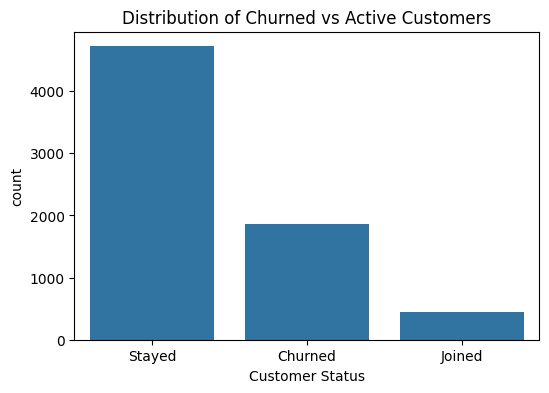

In [174]:
# Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Customer Status', data=customer_churn)
plt.title('Distribution of Churned vs Active Customers')
plt.show()

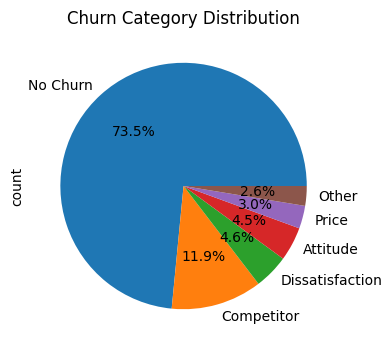

In [173]:
# Churn Categorical Distribution
plt.figure(figsize=(6,4))
temp = customer_churn['Churn Category'].value_counts()
temp.plot.pie(autopct='%1.1f%%')
plt.title('Churn Category Distribution')
plt.show()

## Custormer Demographic Churn

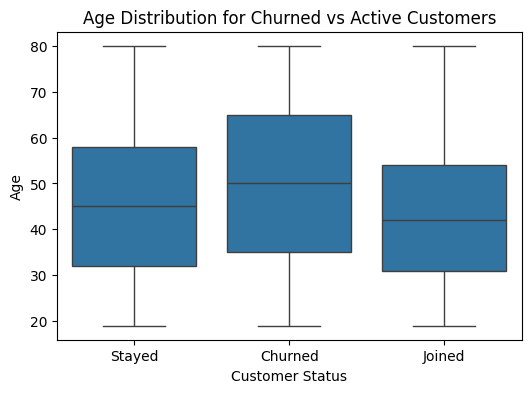

In [172]:
# Box plot to show Age distribution across churned and active customers
plt.figure(figsize=(6,4))
sns.boxplot(x='Customer Status', y='Age', data=customer_churn)
plt.title('Age Distribution for Churned vs Active Customers')
plt.show()


Text(0.5, 1.0, 'Churn Rates Across Gender')

<Figure size 600x400 with 0 Axes>

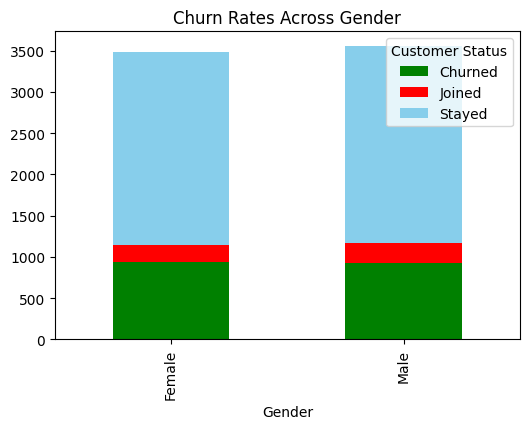

In [175]:
plt.figure(figsize=(6,4))
gender_churn = customer_churn.pivot_table(index='Gender', columns='Customer Status', aggfunc='size')
gender_churn.plot(kind='bar', stacked=True, color=['green', 'red', 'skyblue'], figsize=(6,4))

plt.title('Churn Rates Across Gender')

Text(0.5, 1.0, 'Churn Rates Across Marital Status')

<Figure size 600x400 with 0 Axes>

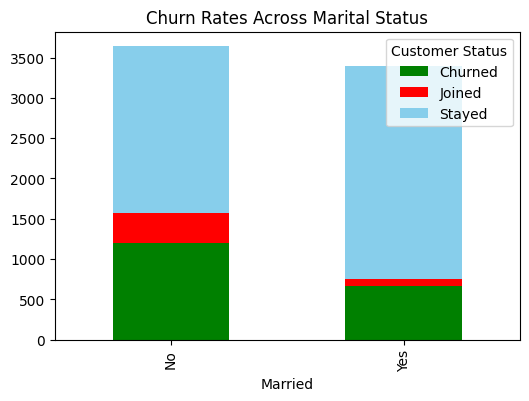

In [176]:
plt.figure(figsize=(6,4))
marital_churn = customer_churn.pivot_table(index='Married', columns='Customer Status', aggfunc='size')
marital_churn.plot(kind='bar', stacked=True, color=['green', 'red', 'skyblue'], figsize=(6,4))

plt.title('Churn Rates Across Marital Status')

## Impact of Contract Type on Churn

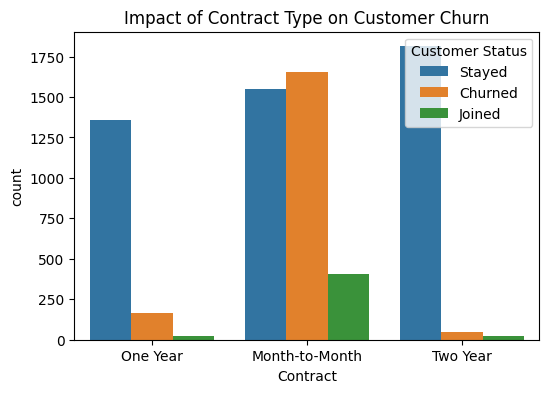

In [171]:
# Contract type and Churn
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Customer Status', data=customer_churn)
plt.title('Impact of Contract Type on Customer Churn')
plt.show()


## Tenure and Churn

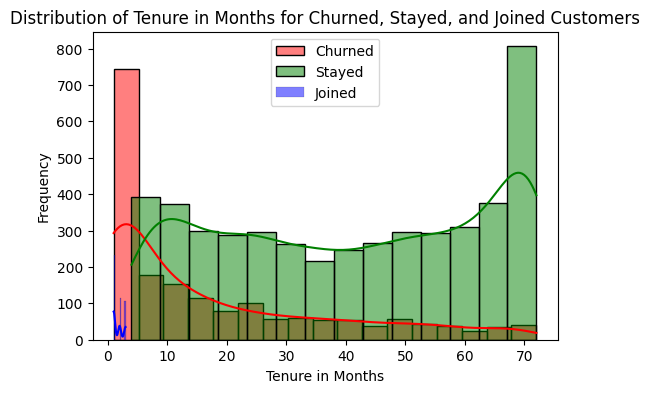

In [148]:
plt.figure(figsize=(6,4))
sns.histplot(customer_churn[customer_churn['Customer Status'] == 'Churned']['Tenure in Months'], kde=True, color='red', label='Churned')
sns.histplot(customer_churn[customer_churn['Customer Status'] == 'Stayed']['Tenure in Months'], kde=True, color='green', label='Stayed')
sns.histplot(customer_churn[customer_churn['Customer Status'] == 'Joined']['Tenure in Months'], kde=True, color='blue', label='Joined')
plt.title('Distribution of Tenure in Months for Churned, Stayed, and Joined Customers')
plt.xlabel('Tenure in Months')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<Axes: xlabel='Tenure in Months', ylabel='Count'>

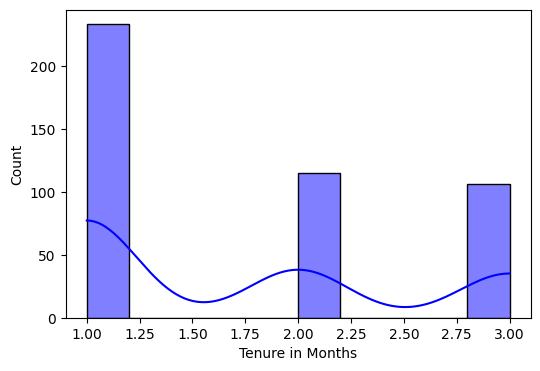

In [147]:
plt.figure(figsize=(6,4))
sns.histplot(customer_churn[customer_churn['Customer Status'] == 'Joined']['Tenure in Months'], kde=True, color='blue', label='Joined')

## Monthly Charges and Churn

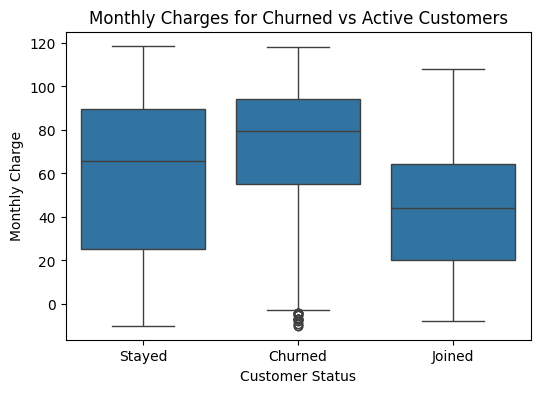

In [149]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Customer Status', y='Monthly Charge', data=customer_churn)
plt.title('Monthly Charges for Churned vs Active Customers')
plt.show()


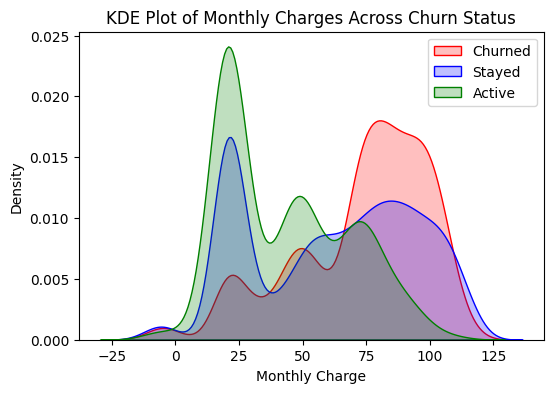

In [161]:
plt.figure(figsize=(6,4))
sns.kdeplot(customer_churn[customer_churn['Customer Status'] == 'Churned']['Monthly Charge'],
            color='red', label='Churned', fill=True)
sns.kdeplot(customer_churn[customer_churn['Customer Status'] == 'Stayed']['Monthly Charge'],
            color='blue', label='Stayed', fill=True)
sns.kdeplot(customer_churn[customer_churn['Customer Status'] == 'Joined']['Monthly Charge'],
            color='green', label='Active', fill=True)

# Add plot details
plt.title('KDE Plot of Monthly Charges Across Churn Status')
plt.xlabel('Monthly Charge')
plt.ylabel('Density')
plt.legend()
plt.show()

## Services and Churn

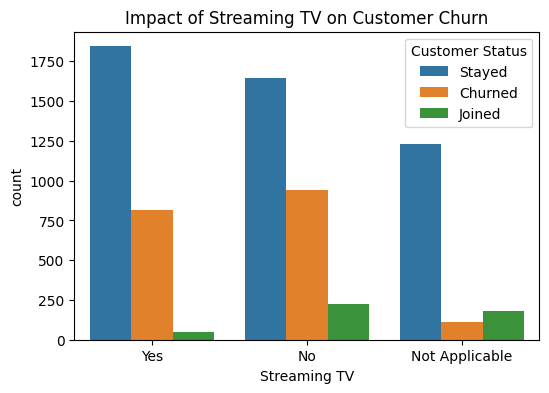

In [164]:
#Streaming TV
plt.figure(figsize=(6,4))
sns.countplot(x='Streaming TV', hue='Customer Status', data=customer_churn)
plt.title('Impact of Streaming TV on Customer Churn')
plt.show()


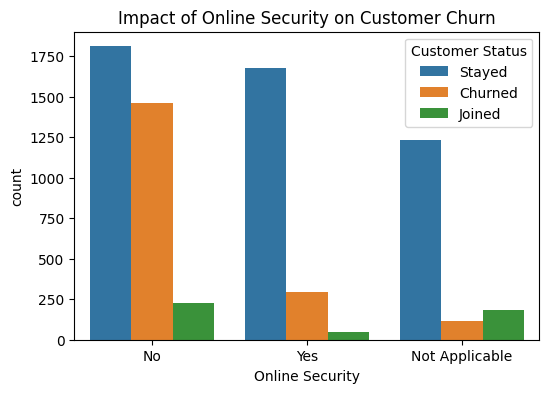

In [167]:
#Online Security
plt.figure(figsize=(6,4))
sns.countplot(x='Online Security', hue='Customer Status', data=customer_churn)
plt.title('Impact of Online Security on Customer Churn')
plt.show()


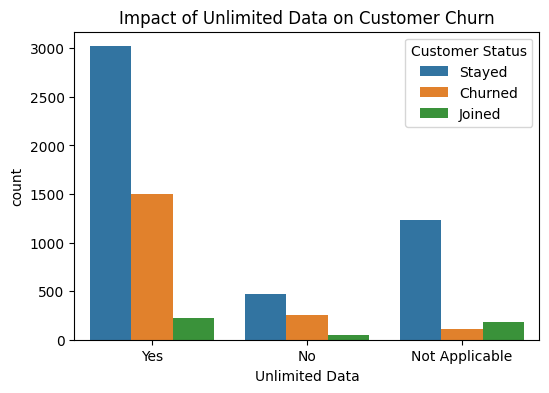

In [168]:
#Unlimited Data
plt.figure(figsize=(6,4))
sns.countplot(x='Unlimited Data', hue='Customer Status', data=customer_churn)
plt.title('Impact of Unlimited Data on Customer Churn')
plt.show()

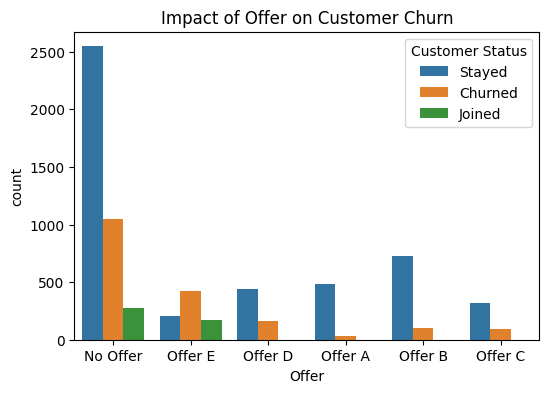

In [170]:
# Offers and Churn
plt.figure(figsize=(6,4))
sns.countplot(x='Offer', hue='Customer Status', data=customer_churn)
plt.title('Impact of Offer on Customer Churn')
plt.show()
